In [1]:
# Standard libraries
import datetime, time
import pandas as pd
import numpy as np
from datetime import datetime

# Visualisations libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.image as mpimg

# Text analysis libraries
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from string import punctuation 

# Image analysis libraries
import pytesseract
import cv2
import os
from PIL import Image
from pytesseract import Output

### 1. General Dataset Analysis

In [2]:
# Load in data
df = pd.read_csv('data/df_fin_merged.csv').drop(columns = "Unnamed: 0")
df['Date'] = pd.to_datetime(df['Date']).dt.date
df

,User,Tweet,Date,Language,Hashtags,Image,Image_jpg,Job_name,Type,Human_annotated,...,Confidence_map_1,Class_map_2,Confidence_map_2,Class_map_3,Confidence_map_3,Class_map_4,Confidence_map_4,Final_label,Final_label_class_num,Meme_text
0,rDankChristian,The beacons are lit! https://t.co/oAymDXtB7z\n...,2021-12-31,en,"[{'text': 'Dank', 'indices': [71, 76]}, {'text...",http://pbs.twimg.com/media/FP_QQDyX0AUc-24.jpg,FP_QQDyX0AUc-24.jpg,labeling-job/cyberbullying-labelling-job,groundtruth/image-classification-multilabel,yes,...,0.05,Racist meme,0.05,0,0.00,None of the four labels,0.95,None of the four labels,4.0,lam so good\nat walking...\n\nWhenever there's...
1,rDankChristian,MY BROTHER IN CHRIST https://t.co/uupYN5kCYN\n...,2021-12-31,en,"[{'text': 'Dank', 'indices': [71, 76]}, {'text...",http://pbs.twimg.com/media/FP_QRoiXsAE4eS5.png,FP_QRoiXsAE4eS5.png,labeling-job/cyberbullying-labelling-job,groundtruth/image-classification-multilabel,yes,...,0.83,Racist meme,0.05,0,0.00,0,0.00,Sexist meme,1.0,Celebrity: *dies*\n\nWikipedia editors:\n\n
2,rDankChristian,Sweet home Alabama! https://t.co/oH65xHomsf\nF...,2021-12-31,en,"[{'text': 'Dank', 'indices': [70, 75]}, {'text...",http://pbs.twimg.com/media/FP_QSZAXEAkr7Vy.jpg,FP_QSZAXEAkr7Vy.jpg,labeling-job/cyberbullying-labelling-job,groundtruth/image-classification-multilabel,yes,...,0.00,Racist meme,0.05,0,0.00,None of the four labels,0.95,None of the four labels,4.0,r--------f_Sr~—™\n\n=\n£\nS\n=\n=\n~\na\nss\n=...
3,rDankChristian,Sad other disciple noises https://t.co/KRTWhsU...,2021-12-31,en,"[{'text': 'Dank', 'indices': [76, 81]}, {'text...",http://pbs.twimg.com/media/FP_QTO6XEAYnnTY.jpg,FP_QTO6XEAYnnTY.jpg,labeling-job/cyberbullying-labelling-job,groundtruth/image-classification-multilabel,yes,...,0.00,0,0.00,Discriminative meme based on mentally/physical...,0.05,None of the four labels,0.95,None of the four labels,4.0,Paul: Women should cover their heads.\nMe: Why...
4,dizzibot1,Gravity \nmeme by - PTomCruiser1\n#memes #fun...,2019-04-28,en,"[{'text': 'memes', 'indices': [33, 39]}, {'tex...",http://pbs.twimg.com/media/FP8mIsHWUAAmqSY.jpg,FP8mIsHWUAAmqSY.jpg,labeling-job/cyberbullying-labelling-job,groundtruth/image-classification-multilabel,yes,...,0.05,0,0.00,Discriminative meme based on mentally/physical...,0.05,None of the four labels,0.95,None of the four labels,4.0,Sometimes all a person needs is\nthat one miss...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,memesbychroath,airplane baby #dankmemes #memes #memesdaily ht...,2019-06-09,en,"[{'text': 'dankmemes', 'indices': [14, 24]}, {...",http://pbs.twimg.com/media/FStkClGXsAAzAKP.jpg,FStkClGXsAAzAKP.jpg,labeling-job/cyberbullying-labelling-job,groundtruth/image-classification-multilabel,yes,...,0.05,0,0.00,0,0.00,None of the four labels,0.95,None of the four labels,4.0,"IST, MY FAULT,\nLEAT GRANDMAS?\n\na &\n\nNOVIT..."
717,DankRedditBot,"Up nex, Scarlett Witch MOM #dankmemes #memes #...",2019-09-09,en,"[{'text': 'dankmemes', 'indices': [27, 37]}, {...",http://pbs.twimg.com/media/FStl1ZzWIAAfkLv.jpg,FStl1ZzWIAAfkLv.jpg,labeling-job/cyberbullying-labelling-job,groundtruth/image-classification-multilabel,yes,...,0.00,Racist meme,0.05,Discriminative meme based on mentally/physical...,0.05,None of the four labels,0.95,None of the four labels,4.0,"ie cebook YouTube,\n"
718,FighterMethod1,Not everyone can understand your chronic illne...,2021-09-16,en,"[{'text': 'chronicillness', 'indices': [50, 65...",http://pbs.twimg.com/media/FStrMrZWIAA9sri.jpg,FStrMrZWIAA9sri.jpg,labeling-job/cyberbullying-labelling-job,groundtruth/image-classification-multilabel,yes,...,0.00,Racist meme,0.05,0,0.00,None of the four labels,0.95,None of the four labels,4.0,That moment you realize\nif you turn your head...
719,DankRedditBot,that's so cheap #dankmemes #memes #memesdaily ...,2019-09-09,en,"[{'text': 'dankmemes', 'indices': [16, 26]}, {...",http://pbs.twimg.com/media/FStu_t9WAAASPmx.png,FStu_t9WAAASPmx.

In [3]:
print(df.shape)

(721, 24)


In [38]:
df.describe()

,Confidence_map_0,Confidence_map_1,Confidence_map_2,Confidence_map_3,Confidence_map_4,Final_label_class_num
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,0.015007,0.058169,0.055992,0.041401,0.853814,3.760055
std,0.082859,0.178111,0.163683,0.119487,0.278490,0.763298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.950000,4.000000
50%,0.000000,0.000000,0.050000,0.050000,0.950000,4.000000
75%,0.000000,0.050000,0.050000,0.050000,0.950000,4.000000
max,0.950000,0.950000,0.950000,0.950000,0.950000,4.000000


In [39]:
miss_df = df.isnull().sum(axis = 0).reset_index()
miss_df.columns = ['variable', 'missing values']
miss_df['filling factor (%)'] = (df.shape[0] - miss_df['missing values']) / df.shape[0] * 100
miss_df.sort_values('filling factor (%)').reset_index(drop = True)
miss_df

,variable,missing values,filling factor (%)
0,User,0,100.000000
1,Tweet,0,100.000000
2,Date,0,100.000000
3,Language,0,100.000000
4,Hashtags,0,100.000000
5,Image,0,100.000000
6,Image_jpg,0,100.000000
7,Job_name,0,100.000000
8,Type,0,100.000000
9,Human_annotated,0,100.000000


In [41]:
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [42]:
unidf = return_unique_values(df)
print(unidf)

                 Features  Uniques
0                    User      420
1                   Tweet      721
2                    Date      362
3                Language        1
4                Hashtags      601
5                   Image      721
6               Image_jpg      721
7                Job_name        1
8                    Type        1
9         Human_annotated        1
10        Annotation_date      721
11            Class_map_0        2
12       Confidence_map_0        7
13            Class_map_1        2
14       Confidence_map_1       10
15            Class_map_2        2
16       Confidence_map_2       10
17            Class_map_3        2
18       Confidence_map_3       16
19            Class_map_4        2
20       Confidence_map_4       16
21            Final_label        5
22  Final_label_class_num        5
23              Meme_text      481


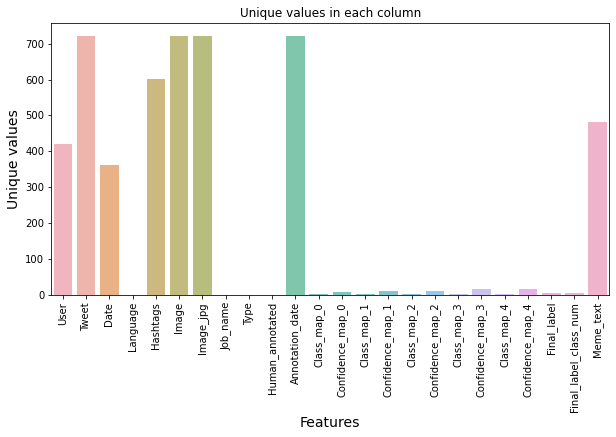

In [54]:
f, ax = plt.subplots(1,1, figsize=(10,5))

sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Unique values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [44]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of Unique {} tweeting'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

c:\Users\richa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


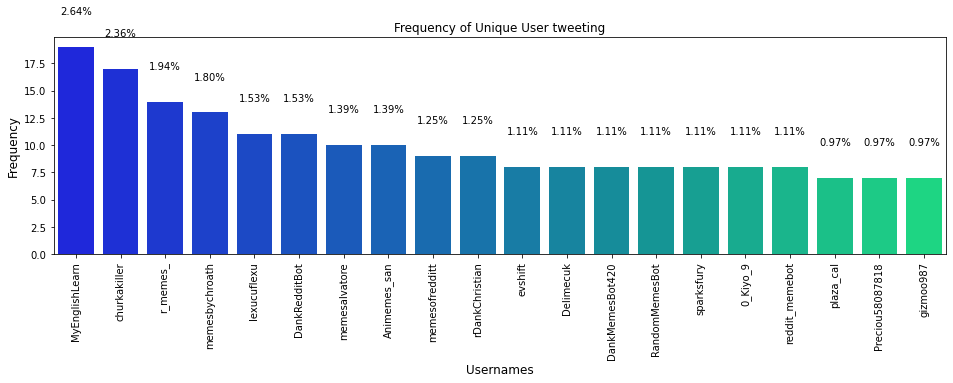

In [45]:
plot_frequency_charts(df, 'User', 'Usernames', 'winter')

### 2. Text Analysis

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\richa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
def punctuation_stopwords_removal(sms):
    # Filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    # Convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

In [48]:
def draw_bar_graph_for_text_visualization(df):
    tweets_from_loc = df.copy()
    tweets_from_loc.loc[:, 'text'] = tweets_from_loc['Tweet'].apply(punctuation_stopwords_removal)
    loc_tweets_curated = tweets_from_loc['text'].tolist()
    loc_tweet_list = []
    for sublist in loc_tweets_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(50), columns=['word', 'Counter'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='Counter', 
                data=loc_top_30_words, ax=ax)
    plt.title("Top 50 Most Prevelant Words")
    plt.xticks(rotation='vertical');

In [49]:
def draw_word_cloud(df, title):
    loc_df = df.copy()
    loc_df.loc[:, 'Tweet'] = loc_df['Tweet'].apply(punctuation_stopwords_removal)
    word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(loc_df['Tweet']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

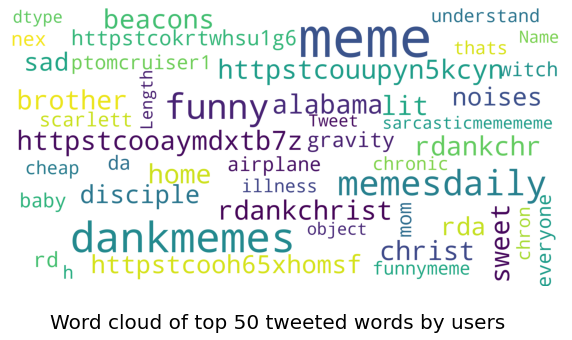

In [61]:
draw_word_cloud(df, 'Word cloud of top 50 tweeted words by users')

c:\Users\richa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\richa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129392 missing from current font.
  font.set_text(s, 0, flags=flags)


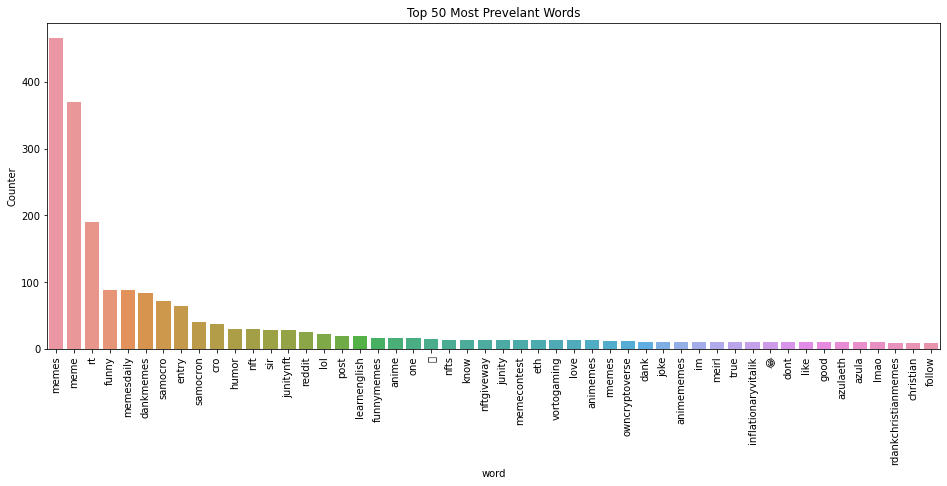

In [51]:
draw_bar_graph_for_text_visualization(df)

### 3. Image-with-text Analysis

In [52]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\richa\AppData\Local\Programs\Tesseract-OCR\Tesseract.exe"

In [53]:
f = []
t = []
input_dir = r'C:/Users/richa/OneDrive/Documenten/GitHub/master_thesis_2022/data/images/'

for root, dirs, filenames in os.walk(input_dir):
    for filename in filenames:
        try:
            print(filename)
            f.append(filename)
            img = Image.open(input_dir + filename)
            text = pytesseract.image_to_string(img)
            t.append(text)
            print(text)
            print('-='*20)
        except:
            continue


df = pd.DataFrame(list(zip(f, t)), columns = ['Image_jpg', 'Meme_text'])

BoRZ04VIMAAdkSc.jpg
4

'
e hotel/manager or Nigel

pial


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
DDkVNaGIFq21rsel.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
E60dIkSXMAIYVEf.jpg
@viraleosmos.

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
E9e-32ZWEAMtE2d.jpg
WAIT, WRIT, WAIT

<5 THAVEYOU' = ~
SCHEDULED YOUR MASSAGE29

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
E9M9Xw1XsAQS3D6.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
E9P_LpOXoAM61iO.jpg
50% + 50%
Everything’ —e
What?! It’s
obviously Sale
Sale, Mabel!

SaSa LeLe.

aa

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Ecf-G-BXsAIM50L.jpg
MY MENTAL
HEALTH


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
EcrV3wdWkAE3Eqw.jpg
NOT ALL WHO
WANDER ARE
| Kos)

SOMETIMES THEY'RE
JUST TRYING TO
FIND COFFEE.

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
EdFF1QTXkAYBKfW.jpg
Take [ole Revel ( =
AY(= Me) al Vm at-le,
one

oui LN

Xe
ss

Cy,
ORFEL

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
EdJLWerWoAAukF1.jpg
When you think you're getting sick
so you take your temperatur

In [84]:
df

,Image_name,Meme_text
0,BoRZ04VIMAAdkSc.jpg,4\n\n'\ne hotel/manager or Nigel\n\npial\n\n
1,DDkVNaGIFq21rsel.jpg,
2,E60dIkSXMAIYVEf.jpg,@viraleosmos.\n
3,E9e-32ZWEAMtE2d.jpg,"WAIT, WRIT, WAIT\n\n<5 THAVEYOU' = ~\nSCHEDULE..."
4,E9M9Xw1XsAQS3D6.jpg,
...,...,...
691,FSwWjRtXoAA6rIh.png,Dr: You're as healthy as a horse\nMe: Great!\n...
692,FSwWrQwXEAAUOia.png,
693,FSwX5FoXoAEVATQ.jpg,"Urge to play 5 ""Let's try something\n\nMass Ef..."
694,FSwYl1yWAAA2QJp.jpg,M i\n\nPN aliesy aYoxoy tayo ic 1 6\n| will ma...


In [28]:
def draw_word_cloud_2(df, title):
    loc_df = df.copy()
    loc_df.loc[:, 'Meme_text'] = loc_df['Meme_text'].apply(punctuation_stopwords_removal)
    word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(loc_df['Meme_text']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

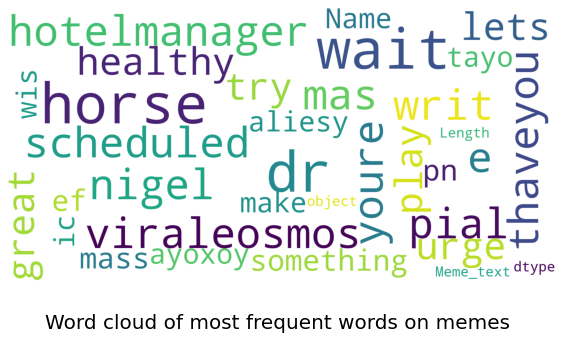

In [59]:
draw_word_cloud_2(df, 'Word cloud of most frequent words on memes')

In [30]:
def draw_bar_graph_for_text_visualization_2(df):
    tweets_from_loc = df.copy()
    tweets_from_loc.loc[:, 'text'] = tweets_from_loc['Meme_text'].apply(punctuation_stopwords_removal)
    loc_tweets_curated = tweets_from_loc['text'].tolist()
    loc_tweet_list = []
    for sublist in loc_tweets_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(50), columns=['word', 'Counter'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='Counter', 
                data=loc_top_30_words, ax=ax)
    plt.title("Most Prevelant Words & Symbols")
    plt.xticks(rotation='vertical');

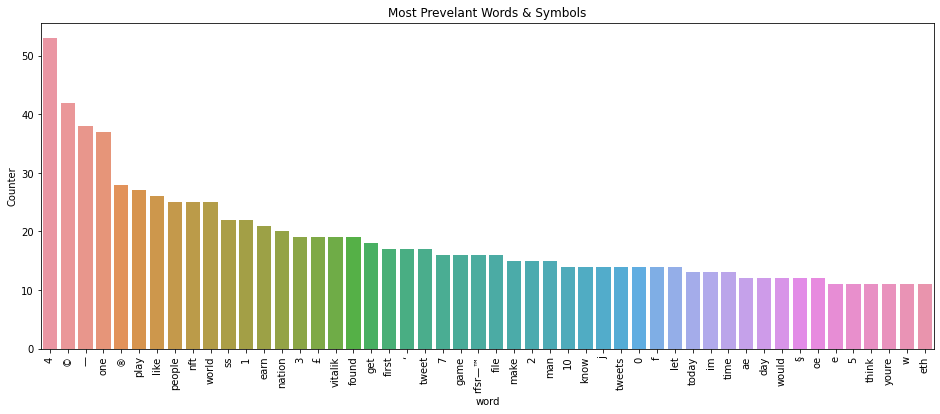

In [31]:
draw_bar_graph_for_text_visualization_2(df)